In [13]:
from jax import config
import jax.numpy as np
from DMA_MR_ss import dma_mr_uncertain_pressures
import matplotlib.pyplot as plt
from opyrability import implicit_map

In [14]:
config.update("jax_enable_x64", True)

In [15]:
theta = np.linspace(0, 2 * np.pi, 225)
phi = -np.pi / 3
a, b= 6e4, 7.5e4
h, k = 101325  , 101325
y1 = h +  (a * np.cos(theta) * np.cos(phi) - b * np.sin(theta) * np.sin(phi))  
y2 = k +  (b * np.sin(theta) * np.cos(phi) + a * np.cos(theta) * np.cos(phi))

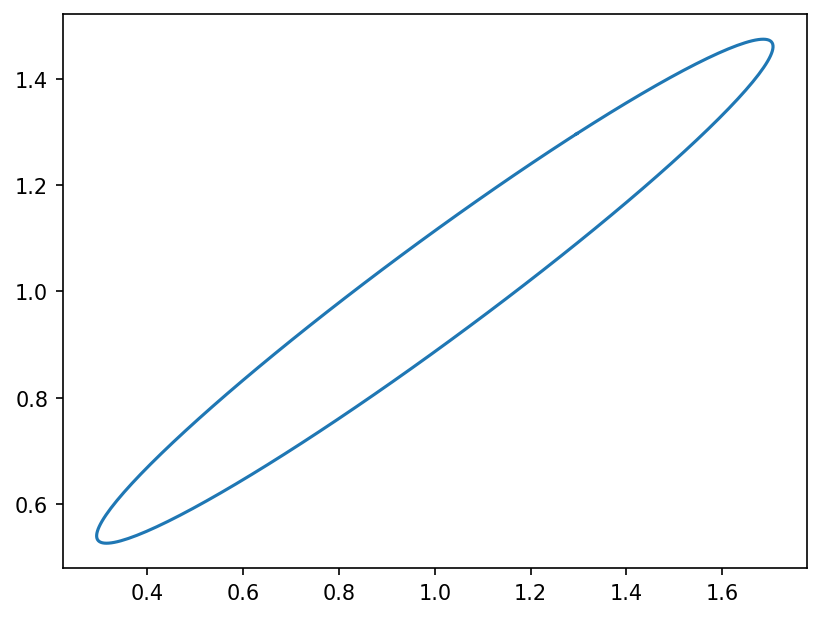

In [16]:
import matplotlib.ticker as ticker

AIS_PTS=np.array([y1,y2]).T
fig, ax = plt.subplots()
ax.plot(AIS_PTS[:,0]/101325, AIS_PTS[:,1]/101325)

# Disable scientific notation on both axes
ax.xaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False, useMathText=False))
ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useOffset=False, useMathText=False))

# Ensure tick labels are in plain format
ax.ticklabel_format(style='plain', axis='both')

plt.show()


In [17]:
output_init = np.array([15, 15])

In [18]:
AIS, AOS, AIS_poly, AOS_poly = implicit_map(dma_mr_uncertain_pressures,  
                                        output_init,
                                        continuation='Explicit RK4',
                                        domain_points=AIS_PTS,
                                        validation='predictor-corrector')

Forward Mapping Selected.
The given domain is recognized as an Available Input Set (AIS).
The result of this mapping is an Achievable Output Set(AOS)
Selected RK4


100%|██████████| 225/225 [01:56<00:00,  1.92it/s]


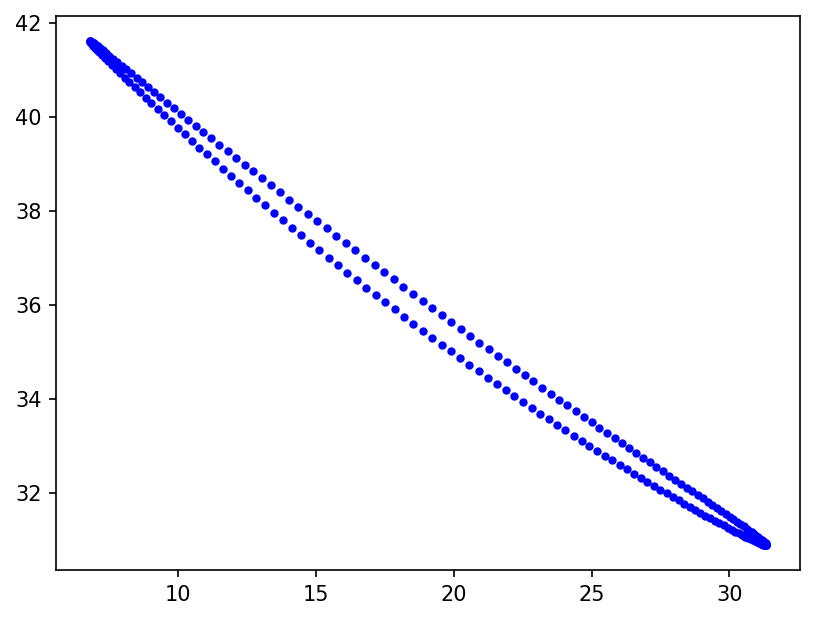

In [19]:
AOS_PTS = AOS.reshape(-1,2)
plt.figure()
plt.plot(AOS_PTS[1:,0], AOS_PTS[1:,-1], 'b.')

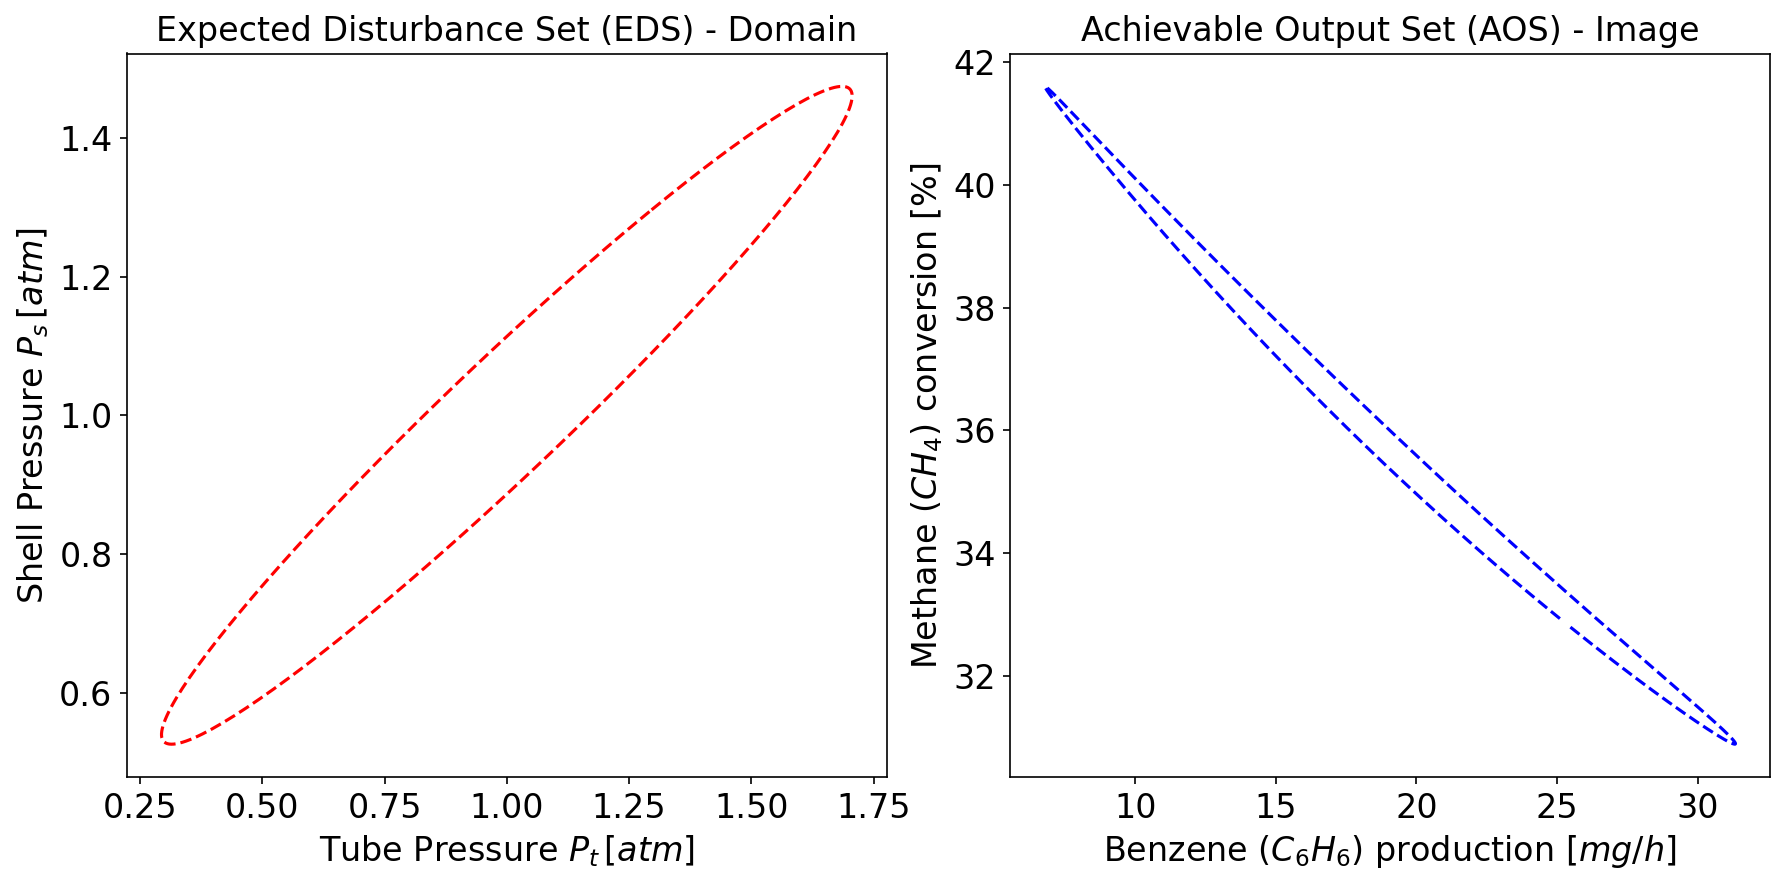

In [20]:
# Plotting the input ellipse for Pressures
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot for Expected Disturbance Set (EDS)
ax1.plot(AIS_PTS[:, 0] / 101325, AIS_PTS[:, 1] / 101325, 'r--')
ax1.set_title('Expected Disturbance Set (EDS) - Domain', fontsize=16)
ax1.set_xlabel('Tube Pressure $P_t \,[atm] $', fontsize=16)
ax1.set_ylabel('Shell Pressure $P_s \,[atm]$', fontsize=16)

# Plot for Achievable Output Set (AOS)
ax2.plot(AOS_PTS[1:, 0], AOS_PTS[1:, 1], 'b--')
ax2.set_title('Achievable Output Set (AOS) - Image', fontsize=16)
ax2.set_xlabel('Benzene $(C_6 H_6)$ production $[mg/h]$', fontsize=16)
ax2.set_ylabel('Methane $(CH_4)$ conversion $[\%]$', fontsize=16)

# Set consistent tick font sizes
for ax in [ax1, ax2]:
    ax.tick_params(axis='both', which='both', labelsize=16)  # Consistent fontsize for ticks

# Apply tight layout
plt.tight_layout()

# Save the figure
plt.savefig("dma_implicit_forward.eps", format="pdf", bbox_inches="tight")